In [1]:
import torch
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, AdamW, BertConfig
import torch.nn.functional as F

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import datetime
import random, re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Check device 
# Get the GPU device name if available.
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available. {}'.format(torch.cuda.device_count()))

    print('We will use the GPU: {}'.format(torch.cuda.get_device_name(0)))

# If we dont have GPU but a CPU, training will take place on CPU instead
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
    
# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

There are %d GPU(s) available. 2
We will use the GPU: GeForce RTX 2080 Ti


In [37]:
import gc
import os
import time
import math
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from transformers import *
from sklearn.metrics import *
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re
import string
import folium
from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model
#from kaggle_datasets import KaggleDatasets
from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *


from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer  

import nltk
from textblob import TextBlob


from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize

from xgboost import XGBClassifier

stopword=set(STOPWORDS)


lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)
random_state = 29

#!pip3 install GPUtil

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    for obj in gc.get_objects():
        if torch.is_tensor(obj):
            del obj
    gc.collect()
    
    print("GPU Usage after emptying the cache")
    gpu_usage()

In [5]:
#!git clone https://github.com/mfliou/nlp_covid

In [6]:
# Read the data
train = pd.read_csv('./nlp_covid/data/covid_train.tsv',sep='\t')
train = train.rename(columns={'Label': 'pre-Label'})

valid = pd.read_csv('./nlp_covid/data/covid_valid.tsv', sep='\t', names=['Id', 'Text', 'pre-Label'])

test = pd.read_csv('./nlp_covid/data/covid_test.tsv',sep='\t', names=['Id', 'Text', 'pre-Label'])

train['Label'] = train['pre-Label'].apply(lambda x: 1 if x == 'INFORMATIVE' else 0)
valid['Label'] = valid['pre-Label'].apply(lambda x: 1 if x == 'INFORMATIVE' else 0)
test['Label'] = test['pre-Label'].apply(lambda x: 1 if x == 'INFORMATIVE' else 0)

train = train.drop('pre-Label', axis = 1)
test = test.drop('pre-Label', axis = 1)
valid = valid.drop('pre-Label', axis = 1)

pd.set_option('display.max_colwidth', 150)


print(train.info())
print(valid.info())
print(test.info())
print()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      6936 non-null   int64 
 1   Text    6936 non-null   object
 2   Label   6936 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 162.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1000 non-null   int64 
 1   Text    1000 non-null   object
 2   Label   1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      2000 non-null   int64 
 1   Text    2000 non-null   object
 2   Label   2000 non-null   int64 
dtypes: int64(2), object(1)
me

,Id,Text,Label
0,1241490299215634434,Official death toll from #covid19 in the United Kingdom is now GREATER than: Germany + Poland + Switzerland + Austria + Portugal + Greece + Sweden...,1
1,1245916400981381130,"Dearest Mr. President @USER 1,169 coronavirus deaths in the US in 24 hours (?) Covid19 pandemic is an international crime from China - not a natur...",1
2,1241132432402849793,"Latest Updates March 20 ⚠️5274 new cases and 38 new deaths in the United States Illinois: Governo Pritzker issues ""stay at home"" order for all res...",1
3,1236107253666607104,"真把公主不当干部 BREAKING: 21 people on Grand Princess cruise ship docked off the California coast tested positive for coronavirus, including 19 crew memb...",1
4,1239673817552879619,OKLAHOMA CITY — The State Department of Education announced Monday the closure of all K-12 public schools statewide until at least April 6 as the ...,0


In [7]:
valid.head()

,Id,Text,Label
0,1241728922192142336,"For those saying Pakistan isn’t Italy; After 3 weeks of the first confirmed case, Pakistan has a higher #Coronavirus growth rate than Italy. Exper...",0
1,1235713405992030209,"Second case DR 🇩🇴 The Canadian woman has not been identified, however they indicated that she is 70 years old and that she was staying with her hu...",1
2,1245941302367305728,Kill Chain: the cyber war on America's elections is a MUST SEE documentary for everyone who uses computers. HTTPURL As of 4/3/20 @USER @USER will ...,0
3,1245913002840391681,Town hosts FIRST #Virtual #TownCouncil meeting via @USER This technology was implemented due to #socialdistancing orders and FL EO 20-69 allowing ...,0
4,1240543259299987457,Report suggested that the actual number of undiagnosed Coronavirus positive cases in the country may be five 20 times than the official figure at ...,0


In [8]:
test.head()

,Id,Text,Label
0,1235770448966754309,"@USER PA hospitals don’t have the capacity. Latest from our local hospital is they will only test those with symptoms who returned from China, Ita...",0
1,1235748200742416384,Coronavirus outbreak: Intel employee in Bengaluru may be discharged today. Follow LIVE updates here: HTTPURL,1
2,1236129620363100161,Trump is trying to BS his way through the coronavirus outbreak. ⁦@USER brings together good evidence and comparisons here that suggest Trump is mo...,0
3,1241191765195001857,@USER How dramatically could we slow down this #Coronavirus from spreading if literally every american wore a mask for 2-3 weeks? I think it would...,0
4,1245182515213676546,"An Instagram post from comedienne Amy Schumer showed noisemaking and applause coming from buildings at around 7 pm, which is when shift changes oc...",0


In [9]:
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train.shape[0]))
print('Number of validation sentences: {:,}\n'.format(valid.shape[0]))
print('Number of test sentences: {:,}\n'.format(test.shape[0]))

Number of training sentences: 6,936

Number of validation sentences: 1,000

Number of test sentences: 2,000



In [10]:
import string

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

# df["text"] = df["text"].apply(lambda x: remove_url(x))
    
def remove_emoji(text):
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols&pics
                               u"\U0001F680-\U0001F6FF" #transportation pic
                               u"\U0001F1E0-\U0001F1FF" #flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"    
                               "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'', text)

# df["text"] = df["text"].apply(lambda x: remove_emoji(x))

def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# df["text"] = df["text"].apply(lambda x: remove_punctuation(x))


def clean_text(text):
    
    text = text.lower() #lowercase
    
    text = re.sub(r'[!]+','!',text)
    text = re.sub(r'[?]+','?',text)
    #text = re.sub(r'[.]+','.',text)
    #text = re.sub(r"'","",text)
    #text = re.sub('\s+', '', text).strip() # Remove and double spaces
    #text = re.sub(r'&amp;?',r'and', text) # replace & -> and
    #text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text) # Remove URLs
    remove_url(text)
    remove_emoji(text)
    #text = re.sub(r'["$%\*\+,-\/:;<=>@\\^_`{|}~]+','',text) #remove some puncts (except . ! # ? &)
    
    return text


# Get the lists of sentences and their labels.
train_sentences = train.Text.values
train_labels = train.Label.values

valid_sentences = valid.Text.values
valid_labels = valid.Label.values

test_sentences = test.Text.values
test_labels = test.Label.values

# Load the BERT tokenizer.
#To feed our text to BERT, it must be split into tokens, and then these tokens must be 
#mapped to their index in the tokenizer vocabulary.
#The tokenization must be performed by the tokenizer included with BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [23]:
train['Text'] = train['Text'].apply(lambda x: clean_text(x))
valid['Text'] = valid['Text'].apply(lambda x: clean_text(x))
test['Text'] = test['Text'].apply(lambda x: clean_text(x))

frames = [train, valid]
train = pd.concat(frames)
train.head()

,Id,Text,Label,clean_tokens
0,1241490299215634434,official death toll from #covid19 in the united kingdom is now greater than: germany + poland + switzerland + austria + portugal + greece + sweden...,1,"[official, death, toll, from, #, covid19, in, the, united, kingdom, is, now, greater, than, :, germany, +, poland, +, switzerland, +, austria, +, ..."
1,1245916400981381130,"dearest mr. president @user 1,169 coronavirus deaths in the us in 24 hours (?) covid19 pandemic is an international crime from china - not a natur...",1,"[dearest, mr., president, @, user, 1,169, coronavirus, deaths, in, the, us, in, 24, hours, (, ?, ), covid19, pandemic, is, an, international, crim..."
2,1241132432402849793,"latest updates march 20 ⚠️5274 new cases and 38 new deaths in the united states illinois: governo pritzker issues ""stay at home"" order for all res...",1,"[latest, updates, march, 20, ⚠️5274, new, cases, and, 38, new, deaths, in, the, united, states, illinois, :, governo, pritzker, issues, ``, stay, ..."
3,1236107253666607104,"真把公主不当干部 breaking: 21 people on grand princess cruise ship docked off the california coast tested positive for coronavirus, including 19 crew memb...",1,"[真把公主不当干部, breaking, :, 21, people, on, grand, princess, cruise, ship, docked, off, the, california, coast, tested, positive, for, coronavirus, ,,..."
4,1239673817552879619,oklahoma city — the state department of education announced monday the closure of all k-12 public schools statewide until at least april 6 as the ...,0,"[oklahoma, city, —, the, state, department, of, education, announced, monday, the, closure, of, all, k-12, public, schools, statewide, until, at, ..."


In [24]:
train["clean_tokens"] = train["Text"].apply(lambda x: word_tokenize(x))

test["clean_tokens"] = test["Text"].apply(lambda x: word_tokenize(x))

In [25]:
from gensim.models import Word2Vec

skip_gram_model = Word2Vec(train['clean_tokens'],vector_size=150,window=3,min_count=2,sg=1)
skip_gram_model.save("skip_gram.model")
skip_gram_model = Word2Vec.load("skip_gram.model")
skip_gram_model.train(train['clean_tokens'],total_examples=len(train['clean_tokens']),epochs=10)

(2413967, 3439970)

In [26]:
cbow_model = Word2Vec(train['clean_tokens'],vector_size=150,window=3,min_count=2)
cbow_model.save("cbow.model")
cbow_model = Word2Vec.load("cbow.model")
cbow_model.train(train['clean_tokens'],total_examples=len(train['clean_tokens']),epochs=10)

(2414394, 3439970)

In [27]:
#train["clean_tokens"] = train["text"].apply(lambda x: word_tokenize(x))
#test["clean_tokens"] = test["text"].apply(lambda x: word_tokenize(x))

def get_word_embeddings(token_list,vector,k=150):
    if len(token_list) < 1:
        return np.zeros(k)
    else:
        vectorized = [vector.wv[word] if word in vector.wv.key_to_index else np.random.rand(k) for word in token_list] 
        
    sum = np.sum(vectorized,axis=0)
    return sum/len(vectorized) 

In [28]:
#X_train_skip_gram = skip_gram_vectorizer(train['clean_tokens'],skip_gram_model)

tokens = train['clean_tokens']


embeddings = tokens.apply(lambda x: get_word_embeddings(x, skip_gram_model))

In [29]:
max_features=5000

# CountVectorizer
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix_train=count_vectorizer.fit_transform(train['Text'])
sparce_matrix_test=count_vectorizer.fit_transform(train['Text'])

def count_vector(data):
    count_vectorizer = CountVectorizer()
    vect = count_vectorizer.fit_transform(data)
    return vect, count_vectorizer

def tfidf_vector(data):
    tfidf_vectorizer = TfidfVectorizer()
    vect = tfidf_vectorizer.fit_transform(data)
    return vect, tfidf_vectorizer

def skip_gram_vectorizer(tokens,vector):
        embeddings = tokens.apply(lambda x: get_word_embeddings(x, skip_gram_model))
        return list(embeddings)

def cbow_vectorizer(tokens,vector):
        embeddings = tokens.apply(lambda x: get_word_embeddings(x, cbow_model))
        return list(embeddings)

X_train_count, count_vectorizer = count_vector(train['Text'])
X_train_tfidf, tfidf_vectorizer = tfidf_vector(train['Text'])
X_train_skip_gram = skip_gram_vectorizer(train['clean_tokens'],skip_gram_model)
X_train_cbow = cbow_vectorizer(train['clean_tokens'],cbow_model)

X_test_count = count_vectorizer.transform(test['Text'])                                                     
X_test_tfidf = tfidf_vectorizer.transform(test['Text'])
X_test_skip_gram = skip_gram_vectorizer(test['clean_tokens'],skip_gram_model)
X_test_cbow = cbow_vectorizer(test['clean_tokens'],cbow_model)

X_train_skip_gram = np.array(X_train_skip_gram)
X_train_cbow = np.array(X_train_cbow)
X_test_skip_gram = np.array(X_test_skip_gram)
X_test_cbow = np.array(X_test_cbow)


# Machine Learning Models


LogisticRegression
SVC
MultinomialNB
DecisionTreeClassifier
KNeighborsClassifier
RandomForestClassifier

In [51]:
metrics = pd.DataFrame(columns=['model' ,'vectoriser', 'f1 score', 'train accuracy','test accuracy'])

In [52]:
from joblib import dump

def fit_and_predict(model,x_train,x_test,y_train,y_test,vectoriser):
    classifier = model
    classifier_name = str(classifier.__class__.__name__)

    if classifier_name=="MultinomialNB" and (vectoriser=="skip gram vector" or vectoriser=="cbow vector"):
        return

    classifier.fit(x_train,y_train)
    filename = classifier_name +" using "+ str(vectoriser)+".joblib"
    filename = filename.lower().replace(" ","_")
    dump(model, filename=filename)
    y_pred = classifier.predict(x_test)
    cmatrix = confusion_matrix(y_test,y_pred)


    f,ax = plt.subplots(figsize=(3,3))
    sns.heatmap(cmatrix,annot=True,linewidths=0.5,cbar=False,linecolor="red",fmt='.0f',ax=ax)
    plt.xlabel("y_predict")
    plt.ylabel("y_true")
    ax.set(title=str(classifier))
    plt.show()


    f1score = f1_score(y_test,y_pred,average='weighted')
    train_accuracy = round(classifier.score(x_train,y_train)*100)
    test_accuracy =  round(accuracy_score(y_test,y_pred)*100)

    global metrics
    metrics = metrics.append({
                              'model': classifier_name,
                              'f1 score': f1score, 
                              'train accuracy': train_accuracy, 
                              'test accuracy': test_accuracy, 
                              'vectoriser': str(vectoriser),
                             },
                               ignore_index=True
                            )

    print(str(classifier.__class__.__name__) +" using "+ str(vectoriser))
    print(classification_report(y_test,y_pred))    
    print('Accuracy of classifier on training set:{}%'.format(train_accuracy))
    print('Accuracy of classifier on test set:{}%' .format(test_accuracy))

#svc_params = {'kernel':'poly', 'C': 0.2367815773799626, 'coef0': 0.6600552789465699, 'random_state':random_state}

xgb_params = {'max_depth':6, 'n_estimators':1000}
lr_params = {'random_state':random_state}
svc_params = {'random_state':random_state}
mnb_params = {}
dtree_params = {'random_state':random_state}
kneigh_params = {}
rforest_params = {'random_state':random_state}

#models=[
#        XGBClassifier(max_depth=6, n_estimators=1000),
#        LogisticRegression(random_state=random_state),
#        SVC(**svc_params),
#        MultinomialNB(),
#        DecisionTreeClassifier(random_state = random_state),
#        KNeighborsClassifier(),
#        RandomForestClassifier(random_state=random_state),
#       ]

models=[
        XGBClassifier(**xgb_params),
        LogisticRegression(**lr_params),
        SVC(**svc_params),
        MultinomialNB(**mnb_params),
        DecisionTreeClassifier(**dtree_params),
        KNeighborsClassifier(**kneigh_params),
        RandomForestClassifier(**rforest_params),
       ]



In [53]:
#from sklearn.svm import SVR
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold,cross_val_score
#from sklearn.metrics import mean_squared_error

import optuna

random_state=55
cv=KFold(n_splits=5,shuffle=True,random_state=random_state)


#X_train_count, count_vectorizer = count_vector(train['clean_text'])
#X_train_tfidf, tfidf_vectorizer = tfidf_vector(train['clean_text'])
#X_train_skip_gram = skip_gram_vectorizer(train['clean_tokens'],skip_gram_model)
#X_train_cbow = cbow_vectorizer(train['clean_tokens'],cbow_model)
#
#X_test_count = count_vectorizer.transform(test['clean_text'])                                                     
#X_test_tfidf = tfidf_vectorizer.transform(test['clean_text'])
#X_test_skip_gram = skip_gram_vectorizer(test['clean_tokens'],skip_gram_model)
#X_test_cbow = cbow_vectorizer(test['clean_tokens'],cbow_model)
#
#X_train_skip_gram = np.array(X_train_skip_gram)
#X_train_cbow = np.array(X_train_cbow)
#X_test_skip_gram = np.array(X_test_skip_gram)
#X_test_cbow = np.array(X_test_cbow)

# Hyperparameter Searching Using Optuna 

## SVC

In [33]:
y = train.Label
x = X_train_count

def objective(trial):
    _C=trial.suggest_float("C",0.1,0.5)
    _coef=trial.suggest_float("coef0",0.5,1)
#    _gamma=trial.suggest_categorical("gamma",['scale','auto'])
#    _degree=trial.suggest_int("degree",0,3)
    svc=SVC(cache_size=5000,kernel="poly",C=_C,coef0=_coef)
    score=cross_val_score(svc,x,y,cv=cv,scoring="neg_root_mean_squared_error").mean()
    return score

optuna.logging.set_verbosity(0)
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=10) # should be 100, temp cut to 10 to reduce run time
svc_params=study.best_params
svc_best_score=study.best_value

print(f"Best score:{svc_best_score}\nOptimized SVC parameters(count): {svc_params}")


KeyboardInterrupt: 

In [ ]:
y = train.Label
x = X_train_tfidf

def objective(trial):
    _C=trial.suggest_float("C",0.1,0.5)
    _coef=trial.suggest_float("coef0",0.5,1)
#    _gamma=trial.suggest_categorical("gamma",['scale','auto'])
#    _degree=trial.suggest_int("degree",0,3)
    svc=SVC(cache_size=5000,kernel="poly",C=_C,coef0=_coef)
    score=cross_val_score(svc,x,y,cv=cv,scoring="neg_root_mean_squared_error").mean()
    return score

optuna.logging.set_verbosity(0)
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=10) # should be 100, temp cut to 10 to reduce run time
svc_params=study.best_params
svc_best_score=study.best_value

print(f"Best score:{svc_best_score}\nOptimized SVC parameters(tfidf): {svc_params}")

In [ ]:
y = train.Label
x = X_train_skip_gram

def objective(trial):
    _C=trial.suggest_float("C",0.1,0.5)
    _coef=trial.suggest_float("coef0",0.5,1)
#    _gamma=trial.suggest_categorical("gamma",['scale','auto'])
#    _degree=trial.suggest_int("degree",0,3)
    svc=SVC(cache_size=5000,kernel="poly",C=_C,coef0=_coef)
    score=cross_val_score(svc,x,y,cv=cv,scoring="neg_root_mean_squared_error").mean()
    return score

optuna.logging.set_verbosity(0)
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=10) # should be 100, temp cut to 10 to reduce run time
svc_params=study.best_params
svc_best_score=study.best_value

print(f"Best score:{svc_best_score}\nOptimized SVC parameters(skip_gram): {svc_params}")

In [ ]:
y = train.Label
x = X_train_cbow

def objective(trial):
    _C=trial.suggest_float("C",0.1,0.5)
    _coef=trial.suggest_float("coef0",0.5,1)
#    _gamma=trial.suggest_categorical("gamma",['scale','auto'])
#    _degree=trial.suggest_int("degree",0,3)
    svc=SVC(cache_size=5000,kernel="poly",C=_C,coef0=_coef)
    score=cross_val_score(svc,x,y,cv=cv,scoring="neg_root_mean_squared_error").mean()
    return score

optuna.logging.set_verbosity(0)
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=10) # should be 100, temp cut to 10 to reduce run time
svc_params=study.best_params
svc_best_score=study.best_value

print(f"Best score:{svc_best_score}\nOptimized SVC parameters(cbow): {svc_params}")

Ready to Run

In [48]:
xgb_params = {'max_depth':6, 'n_estimators':1000}
lr_params = {'random_state':random_state}
svc_params = {'random_state':random_state}
mnb_params = {}
dtree_params = {'random_state':random_state}
kneigh_params = {}
rforest_params = {'random_state':random_state}

models=[
        XGBClassifier(**xgb_params),
        LogisticRegression(**lr_params),
        SVC(**svc_params),
        MultinomialNB(**mnb_params),
        DecisionTreeClassifier(**dtree_params),
        KNeighborsClassifier(**kneigh_params),
        RandomForestClassifier(**rforest_params),
       ]

[22:34:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


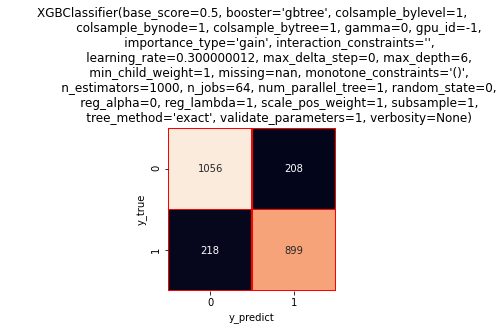

XGBClassifier using Count vector
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1264
           1       0.81      0.80      0.81      1117

    accuracy                           0.82      2381
   macro avg       0.82      0.82      0.82      2381
weighted avg       0.82      0.82      0.82      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:82%
[22:34:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


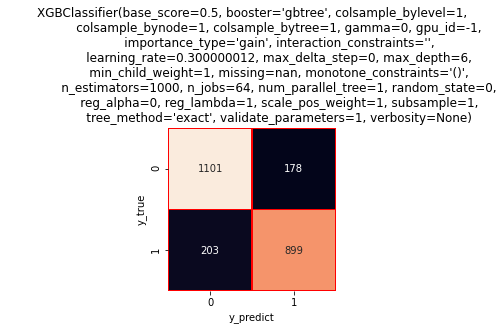

XGBClassifier using Tfidf vector
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1279
           1       0.83      0.82      0.83      1102

    accuracy                           0.84      2381
   macro avg       0.84      0.84      0.84      2381
weighted avg       0.84      0.84      0.84      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:84%
[22:34:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


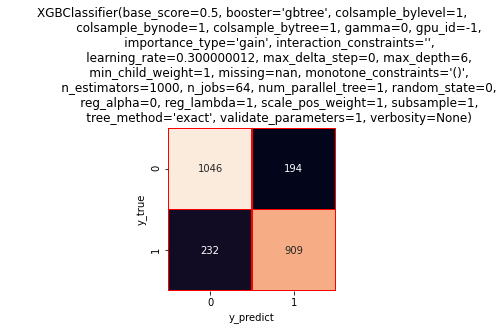

XGBClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1240
           1       0.82      0.80      0.81      1141

    accuracy                           0.82      2381
   macro avg       0.82      0.82      0.82      2381
weighted avg       0.82      0.82      0.82      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:82%
[22:35:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


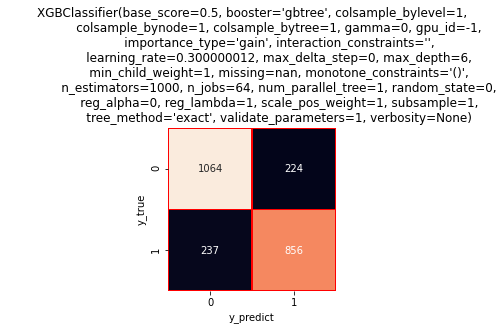

XGBClassifier using cbow vector
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1288
           1       0.79      0.78      0.79      1093

    accuracy                           0.81      2381
   macro avg       0.81      0.80      0.80      2381
weighted avg       0.81      0.81      0.81      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:81%


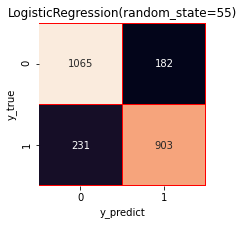

LogisticRegression using Count vector
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1247
           1       0.83      0.80      0.81      1134

    accuracy                           0.83      2381
   macro avg       0.83      0.83      0.83      2381
weighted avg       0.83      0.83      0.83      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:83%


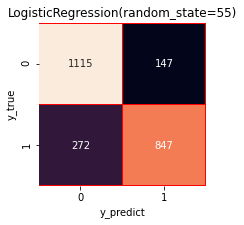

LogisticRegression using Tfidf vector
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1262
           1       0.85      0.76      0.80      1119

    accuracy                           0.82      2381
   macro avg       0.83      0.82      0.82      2381
weighted avg       0.83      0.82      0.82      2381

Accuracy of classifier on training set:91%
Accuracy of classifier on test set:82%


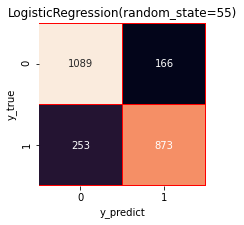

LogisticRegression using skip gram vector
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1255
           1       0.84      0.78      0.81      1126

    accuracy                           0.82      2381
   macro avg       0.83      0.82      0.82      2381
weighted avg       0.83      0.82      0.82      2381

Accuracy of classifier on training set:83%
Accuracy of classifier on test set:82%


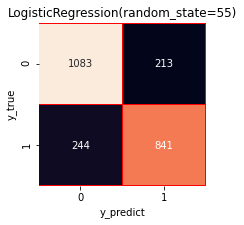

LogisticRegression using cbow vector
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1296
           1       0.80      0.78      0.79      1085

    accuracy                           0.81      2381
   macro avg       0.81      0.81      0.81      2381
weighted avg       0.81      0.81      0.81      2381

Accuracy of classifier on training set:82%
Accuracy of classifier on test set:81%


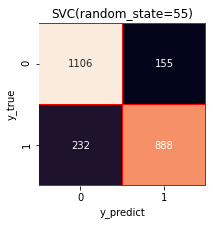

SVC using Count vector
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1261
           1       0.85      0.79      0.82      1120

    accuracy                           0.84      2381
   macro avg       0.84      0.83      0.84      2381
weighted avg       0.84      0.84      0.84      2381

Accuracy of classifier on training set:97%
Accuracy of classifier on test set:84%


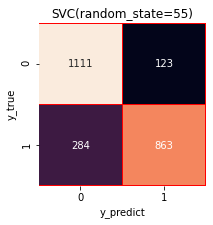

SVC using Tfidf vector
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1234
           1       0.88      0.75      0.81      1147

    accuracy                           0.83      2381
   macro avg       0.84      0.83      0.83      2381
weighted avg       0.83      0.83      0.83      2381

Accuracy of classifier on training set:99%
Accuracy of classifier on test set:83%


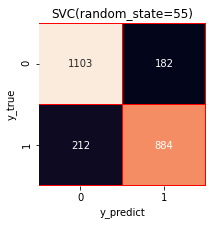

SVC using skip gram vector
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1285
           1       0.83      0.81      0.82      1096

    accuracy                           0.83      2381
   macro avg       0.83      0.83      0.83      2381
weighted avg       0.83      0.83      0.83      2381

Accuracy of classifier on training set:84%
Accuracy of classifier on test set:83%


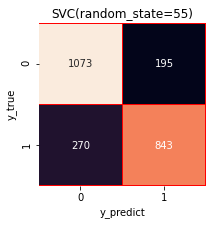

SVC using cbow vector
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1268
           1       0.81      0.76      0.78      1113

    accuracy                           0.80      2381
   macro avg       0.81      0.80      0.80      2381
weighted avg       0.81      0.80      0.80      2381

Accuracy of classifier on training set:84%
Accuracy of classifier on test set:80%


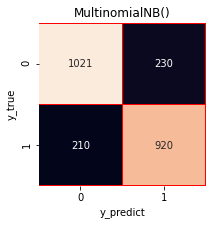

MultinomialNB using Count vector
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1251
           1       0.80      0.81      0.81      1130

    accuracy                           0.82      2381
   macro avg       0.81      0.82      0.81      2381
weighted avg       0.82      0.82      0.82      2381

Accuracy of classifier on training set:92%
Accuracy of classifier on test set:82%


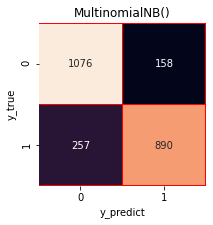

MultinomialNB using Tfidf vector
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1234
           1       0.85      0.78      0.81      1147

    accuracy                           0.83      2381
   macro avg       0.83      0.82      0.82      2381
weighted avg       0.83      0.83      0.83      2381

Accuracy of classifier on training set:92%
Accuracy of classifier on test set:83%


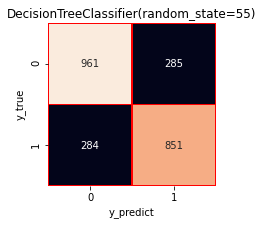

DecisionTreeClassifier using Count vector
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1246
           1       0.75      0.75      0.75      1135

    accuracy                           0.76      2381
   macro avg       0.76      0.76      0.76      2381
weighted avg       0.76      0.76      0.76      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:76%


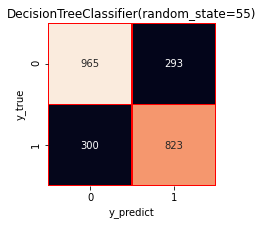

DecisionTreeClassifier using Tfidf vector
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1258
           1       0.74      0.73      0.74      1123

    accuracy                           0.75      2381
   macro avg       0.75      0.75      0.75      2381
weighted avg       0.75      0.75      0.75      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:75%


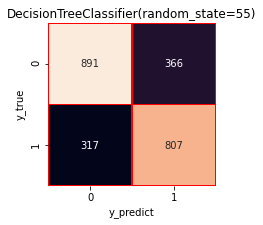

DecisionTreeClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1257
           1       0.69      0.72      0.70      1124

    accuracy                           0.71      2381
   macro avg       0.71      0.71      0.71      2381
weighted avg       0.71      0.71      0.71      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:71%


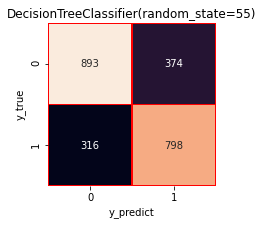

DecisionTreeClassifier using cbow vector
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1267
           1       0.68      0.72      0.70      1114

    accuracy                           0.71      2381
   macro avg       0.71      0.71      0.71      2381
weighted avg       0.71      0.71      0.71      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:71%


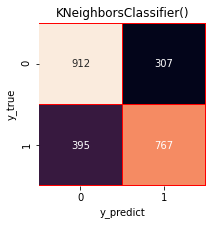

KNeighborsClassifier using Count vector
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1219
           1       0.71      0.66      0.69      1162

    accuracy                           0.71      2381
   macro avg       0.71      0.70      0.70      2381
weighted avg       0.71      0.71      0.70      2381

Accuracy of classifier on training set:81%
Accuracy of classifier on test set:71%


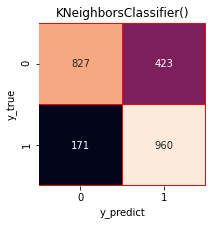

KNeighborsClassifier using Tfidf vector
              precision    recall  f1-score   support

           0       0.83      0.66      0.74      1250
           1       0.69      0.85      0.76      1131

    accuracy                           0.75      2381
   macro avg       0.76      0.76      0.75      2381
weighted avg       0.76      0.75      0.75      2381

Accuracy of classifier on training set:84%
Accuracy of classifier on test set:75%


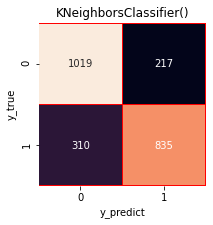

KNeighborsClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1236
           1       0.79      0.73      0.76      1145

    accuracy                           0.78      2381
   macro avg       0.78      0.78      0.78      2381
weighted avg       0.78      0.78      0.78      2381

Accuracy of classifier on training set:86%
Accuracy of classifier on test set:78%


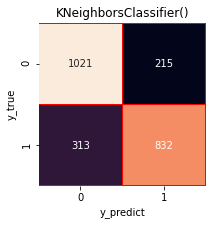

KNeighborsClassifier using cbow vector
              precision    recall  f1-score   support

           0       0.77      0.83      0.79      1236
           1       0.79      0.73      0.76      1145

    accuracy                           0.78      2381
   macro avg       0.78      0.78      0.78      2381
weighted avg       0.78      0.78      0.78      2381

Accuracy of classifier on training set:84%
Accuracy of classifier on test set:78%


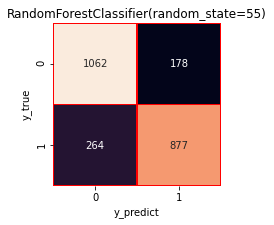

RandomForestClassifier using Count vector
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1240
           1       0.83      0.77      0.80      1141

    accuracy                           0.81      2381
   macro avg       0.82      0.81      0.81      2381
weighted avg       0.82      0.81      0.81      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:81%


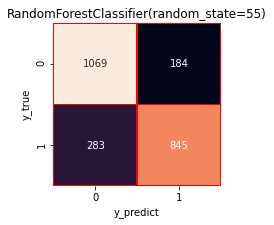

RandomForestClassifier using Tfidf vector
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1253
           1       0.82      0.75      0.78      1128

    accuracy                           0.80      2381
   macro avg       0.81      0.80      0.80      2381
weighted avg       0.81      0.80      0.80      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:80%


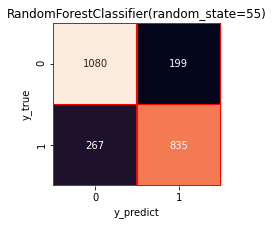

RandomForestClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1279
           1       0.81      0.76      0.78      1102

    accuracy                           0.80      2381
   macro avg       0.80      0.80      0.80      2381
weighted avg       0.80      0.80      0.80      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:80%


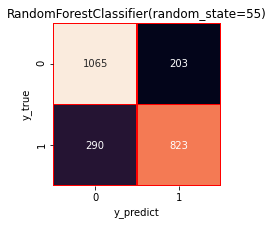

RandomForestClassifier using cbow vector
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1268
           1       0.80      0.74      0.77      1113

    accuracy                           0.79      2381
   macro avg       0.79      0.79      0.79      2381
weighted avg       0.79      0.79      0.79      2381

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:79%


In [54]:
for model in models:
    y = train.Label

    x = X_train_count
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
    fit_and_predict(model,x_train,x_test,y_train,y_test,'Count vector')
    
    x = X_train_tfidf
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
    fit_and_predict(model,x_train,x_test,y_train,y_test, 'Tfidf vector')
    
    x = X_train_skip_gram
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
    fit_and_predict(model,x_train,x_test,y_train,y_test, 'skip gram vector')
    
    x = X_train_cbow
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
    fit_and_predict(model,x_train,x_test,y_train,y_test, 'cbow vector')    

In [55]:
metrics = metrics.sort_values('f1 score',ascending=False)

In [56]:
metrics

,model,vectoriser,f1 score,train accuracy,test accuracy
1,XGBClassifier,Tfidf vector,0.839840,100,84
8,SVC,Count vector,0.836978,97,84
10,SVC,skip gram vector,0.834330,84,83
9,SVC,Tfidf vector,0.827846,99,83
4,LogisticRegression,Count vector,0.826299,100,83
13,MultinomialNB,Tfidf vector,0.825134,92,83
6,LogisticRegression,skip gram vector,0.823435,83,82
5,LogisticRegression,Tfidf vector,0.822970,91,82
0,XGBClassifier,Count vector,0.821034,100,82
2,XGBClassifier,skip gram vector,0.820919,100,82


In [57]:
free_gpu_cache()

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% | 64% |
|  1 |  0% |  1% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  1% | 65% |
|  1 |  0% |  1% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |


# LSTM

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,GRU, Dropout, Activation, Input, Flatten, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras import layers
from keras import optimizers
from functools import reduce

In [59]:
EPOCH = 1
BATCH_SIZE = 32
EMBED_DIM = 32
LEARNING_RATE = 0.002
M_DROPOUT = 0.2
LSTM_MODEL = 32
LSTM_DROPOUT = 0.2
RNN_DROPOUT = 0.4
FFN_DIM = 1

In [60]:
def train_lstm(x_train,x_test,y_train,y_test,vectorizer_name,vocab_size,input_length):
    epochs = EPOCH
    verbose = 1
    batch_size = BATCH_SIZE
    embed_dim = EMBED_DIM
    optimizer = optimizers.Adam(lr=LEARNING_RATE)
    
    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim,input_length = input_length))
    model.add(Dropout(M_DROPOUT))
    model.add(LSTM(LSTM_MODEL, dropout=LSTM_DROPOUT, recurrent_dropout=RNN_DROPOUT))
    model.add(Dense(FFN_DIM, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
    
    print(model.summary())

    model.fit(x_train, y_train, epochs = epochs, verbose = verbose, batch_size=batch_size, validation_data=(x_test, y_test))

    model_name = "LSTM using "+ vectorizer_name 
    model.save(model_name)
    y_pred = model.predict(x_test)

    f1score = f1_score(y_test,y_pred.round(),average='weighted')
    train_accuracy = round(accuracy_score(y_train,reduce(list.__add__, model.predict(x_train).round().tolist()))*100)
    test_accuracy =  round(accuracy_score(y_test,y_pred.round())*100)

    global metrics
    metrics = metrics.append({
                              'model': model_name,
                              'f1 score': f1score, 
                              'train accuracy': train_accuracy, 
                              'test accuracy': test_accuracy, 
                              'vectoriser': vectorizer_name,
                             },
                               ignore_index=True
                            )

    print(model_name)
    print(classification_report(y_test,y_pred.round()))    
    print('Accuracy of classifier on training set:{}%'.format(train_accuracy))
    print('Accuracy of classifier on test set:{}%' .format(test_accuracy))
    #return test_accuracy

In [61]:
##### y = train['target'].values


# x_train, x_test, y_train, y_test = train_test_split(X_train_cbow),y, test_size = 0.3)
# train_lstm(x_train,x_test,y_train,y_test, 'cbow vector',5329,150)

x_train, x_test, y_train, y_test = train_test_split(X_train_skip_gram,y, test_size = 0.3)
train_lstm(x_train,x_test,y_train,y_test, 'skip gram vector',5329,150)

# x_train, x_test, y_train, y_test = train_test_split(X_train_count,y, test_size = 0.3)
# train_lstm(x_train,x_test,y_train,y_test,'Count vector',14455,7613)

# x_train, x_test, y_train, y_test = train_test_split(X_train_tfidf,y, test_size = 0.3)
# train_lstm(x_train,x_test,y_train,y_test, 'Tfidf vector',14455,7613)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 32)           170528    
_________________________________________________________________
dropout (Dropout)            (None, 150, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 178,881
Trainable params: 178,881
Non-trainable params: 0
_________________________________________________________________
None
174/174 [==============================] - 29s 158ms/step - loss: 0.6924 - accuracy: 0.5248 - val_loss: 0.6946 - val_accuracy: 0.5153
INFO:tensorflow:Assets written to: LSTM using skip gram vector/assets
LSTM using skip gram vector
           

In [62]:
free_gpu_cache()

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% | 65% |
|  1 |  0% |  1% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  0% | 65% |
|  1 |  0% |  1% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |


# Electra

In [63]:
import re
import torch
from transformers import ElectraTokenizer, ElectraForSequenceClassification,AdamW
import torch
from sklearn.metrics import classification_report
import random
import time
import datetime
import numpy as np
import pandas as pd
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

In [64]:
if torch.cuda.is_available():  
    device = torch.device("cuda")
    print('We will use the GPU:', torch.cuda.get_device_name(0))    
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


We will use the GPU: GeForce RTX 2080 Ti


In [65]:
train = train.rename(columns={'Label': 'target'})
train = train.rename(columns={'Id': 'id'})
train = train.rename(columns={'Text': 'text'})

valid = valid.rename(columns={'Label': 'target'})
valid = valid.rename(columns={'Id': 'id'})
valid = valid.rename(columns={'Text': 'text'})

test = test.rename(columns={'Label': 'target'})
test = test.rename(columns={'Id': 'id'})
test = test.rename(columns={'Text': 'text'})

frames = [train, valid]
df_train= pd.concat(frames)
df_test= test

In [66]:
def preprocess(text):
    text=text.lower()
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>')
    text = re.sub(r"(?:\@)\w+", '', text)
    text=text.encode("ascii",errors="ignore").decode()
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    text=" ".join(text.split())
    return text
df_train['text'] = df_train['text'].apply(preprocess)
df_test['text'] = df_test['text'].apply(preprocess)
df_train=df_train[df_train["text"]!='']


In [67]:
df_train=df_train[["text","target"]]

In [68]:
texts = df_train.text.values
labels = df_train.target.values

In [69]:
torch.cuda.empty_cache()
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator',num_labels=2)
model.cuda()

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.d

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [70]:
indices=tokenizer.batch_encode_plus(texts,max_length=64,add_special_tokens=True, return_attention_mask=True,padding='max_length',truncation=True)
input_ids=indices["input_ids"]
attention_masks=indices["attention_mask"]

In [71]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.2)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.2)

In [72]:
# Converting all of our data into torch tensors
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels, dtype=torch.long)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)
train_masks = torch.tensor(train_masks, dtype=torch.long)
validation_masks = torch.tensor(validation_masks, dtype=torch.long)

In [73]:
batch_size = 32

# the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [74]:
optimizer = AdamW(model.parameters(),
                  lr = 6e-6, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


# Number of training epochs (authors recommend between 2 and 4)
epochs = 5

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [75]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


In [76]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [77]:
# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 100 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # As we unpack the batch, we'll also copy each tensor to the GPU  
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)

        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
      
print("")
print("Training complete!")


======== Epoch 1 / 5 ========
Training...


RuntimeError: CUDA out of memory. Tried to allocate 24.00 MiB (GPU 0; 10.76 GiB total capacity; 2.76 GiB already allocated; 20.69 MiB free; 2.90 GiB reserved in total by PyTorch)

In [78]:
# Validation               

print("")
print("Running Validation...")

t0 = time.time()

model.eval()

preds=[]
true=[]

eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# Evaluate data for one epoch
for batch in validation_dataloader:
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.

        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # Get the "logits" output by the model. The "logits" are the output
    # values prior to applying an activation function like the softmax.
    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    preds.append(logits)
    true.append(label_ids)
    # Calculate the accuracy for this batch of test sentences.
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    # Accumulate the total accuracy.
    eval_accuracy += tmp_eval_accuracy

    # Track the number of batches
    nb_eval_steps += 1

# Report the final accuracy for this validation run.
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Validation took: {:}".format(format_time(time.time() - t0)))


Running Validation...


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 10.76 GiB total capacity; 2.78 GiB already allocated; 20.69 MiB free; 2.90 GiB reserved in total by PyTorch)

# Electra - Predictions

In [47]:
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(test.shape[0]))

# Tokenize all of the sentences and map the tokens to thier word IDs.
test_input_ids = []
test_attention_masks = []

# For every sentence...
for sent in test_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)

test_labels = torch.tensor(test_labels)

# Print sentence 0, now as a list of IDs.
print('test Original sentence: ', test_sentences[0])
print('test Token IDs list:', test_input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Number of test sentences: 2,000

test Original sentence:  @USER PA hospitals don’t have the capacity. Latest from our local hospital is they will only test those with symptoms who returned from China, Italy, Iran, Japan , or South Korea in last 14 days or those who have been in contact with someone with confirmed COVID-19 in the last 14 days.
test Token IDs list: tensor([  101,  1030,  5310,  6643,  8323,  2123,  1521,  1056,  2031,  1996,
         3977,  1012,  6745,  2013,  2256,  2334,  2902,  2003,  2027,  2097,
         2069,  3231,  2216,  2007,  8030,  2040,  2513,  2013,  2859,  1010,
         3304,  1010,  4238,  1010,  2900,  1010,  2030,  2148,  4420,  1999,
         2197,  2403,  2420,  2030,  2216,  2040,  2031,  2042,  1999,  3967,
         2007,  2619,  2007,  4484,  2522, 17258,  1011,  2539,  1999,  1996,
         2197,  2403,  2420,   102])


In [48]:
# Set test_data_set, the batch size and create DataLoader
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)

batch_size = 32 # same as in training: 32  

test_dataloader = DataLoader(
            test_dataset, # The test samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [52]:
print("")
print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

test_stats = []

t0 = time.time()

# Put the model in evaluation mode--the dropout layers behave differently
# during evaluation.
model.eval()

# Tracking variables 
total_eval_accuracy = 0
total_eval_loss = 0
nb_eval_steps = 0

# Evaluate data for one epoch
for batch in test_dataloader:

    # Unpack this training batch from our dataloader. 
    # As we unpack the batch, I'll also copy each tensor to the GPU using the `to` method.
    #
    # `batch` contains three pytorch tensors:
    #   [0]: input ids 
    #   [1]: attention masks
    #   [2]: labels 
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    # Tell pytorch not to bother with constructing the compute graph during
    # the forward pass, since this is only needed for backprop (training).
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        (loss, logits) = model(b_input_ids, 
                               token_type_ids=None, 
                               attention_mask=b_input_mask,
                               labels=b_labels,
                               return_dict=False)

    # Accumulate the validation loss.
    total_eval_loss += loss.item()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Calculate the accuracy for this batch of test sentences, and
    # accumulate it over all batches.
    total_eval_accuracy += flat_accuracy(logits, label_ids)


# Report the final accuracy for this validation run.
avg_test_accuracy = total_eval_accuracy / len(test_dataloader)
print("  Accuracy: {0:.2f}".format(avg_test_accuracy))

# Calculate the average loss over all of the batches.
avg_test_loss = total_eval_loss / len(test_dataloader)

# Measure how long the validation run took.
test_time = format_time(time.time() - t0)

print("  Test Loss: {0:.2f}".format(avg_test_loss))
print("  Test took  {:} time".format(test_time))

# Record all statistics from this epoch.
#    test_stats.append(
#        {
#            'Test. Loss': avg_val_loss,
#            'Test. Accur.': avg_val_accuracy,
#            'Test time': test_time
#        }
#    )


Predicting labels for 2,000 test sentences...
  Accuracy: 0.87
  Test Loss: 0.38
  Test took  0:00:03 time
